## Examen Segundo Parcial - Visión para robots
---

#### **Instrucciones** 

1. Lee el notebook completo antes de iniciar.
2. Contesta las celdas de preguntas directamente en el notebook.
3. Para las partes de código, agrega todas las celdas de código que consideres necesarias.
4. El notebook se entrega en Canvas. **Garantiza que hayas ejecutado todas las celdas de código antes de subirlo.**

### Preguntas de código
---

Imports básicos y ruta de las imágenes de prueba.

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

#### Ejercicio 1 (45 puntos)

Desarrolla un pipeline de gráficas para convertir la imagen **woman.jpg**:

![Examen 1](images/woman.jpg)

en la siguiente:

![Examen 2](images/woman_final.png)

El fondo es el mismo que la primer imagen, y solo cambia la mujer que aparece. La mujer cambia a tener menos colores, y se dibuja el contorno encima de la mujer.

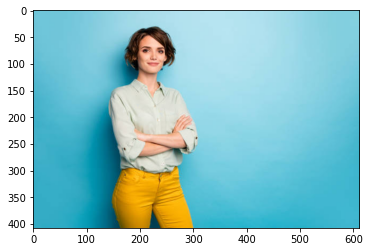

In [2]:
#read the image
img = cv2.imread('images/woman.jpg')
copy_img = np.copy(img)
copy_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(copy_img)


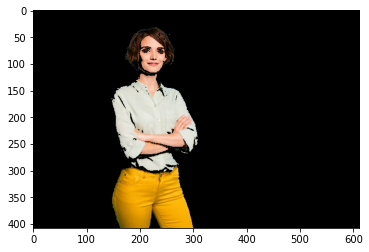

In [3]:
lower_blue = np.array([0,10,55]) 
upper_blue = np.array([190,255,255])

# Define the masked area
mask = cv2.inRange(copy_img, lower_blue, upper_blue)
masked_image = np.copy(copy_img)
# Mask the image to let the woman show through
masked_image[mask!=0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)


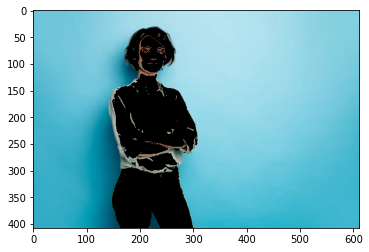

In [4]:
background_image = np.copy(copy_img)
background_image[mask==0] = [0,0,0]

plt.imshow(background_image)

In [5]:
pixel_vals = masked_image.reshape((masked_image.shape[0]*masked_image.shape[1],3))

print(pixel_vals.shape)

# Convert to float type
pixel_vals = np.float32(pixel_vals)

(249696, 3)


In [6]:
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 10, 1.0)

k = 11
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

In [7]:
print(centers)

distinct_labels = list(set(labels.flatten()))
print(distinct_labels)

[[4.74008446e+01 3.13068104e+01 2.05183849e+01]
 [4.59383205e-02 2.37824358e-02 1.49915377e-02]
 [2.20581619e+02 2.21686752e+02 2.10766556e+02]
 [2.18289597e+02 1.53161392e+02 1.22318695e+02]
 [1.93658600e+02 1.29762985e+02 2.99798298e+00]
 [2.41731750e+02 1.88490112e+02 1.62389633e+02]
 [1.27287689e+02 9.19346695e+01 5.73366833e+00]
 [2.21240082e+02 1.50200699e+02 2.77016640e+00]
 [9.13608932e+01 6.29912453e+01 3.76867714e+01]
 [2.46442108e+02 1.74802200e+02 8.26259518e+00]
 [1.63835831e+02 1.10806969e+02 3.79602003e+00]]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


(408, 612)


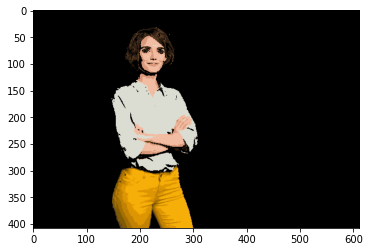

In [8]:
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((masked_image.shape))
labels_reshape = labels.reshape(masked_image.shape[0], masked_image.shape[1])

plt.imshow(segmented_image)
print(labels_reshape.shape)

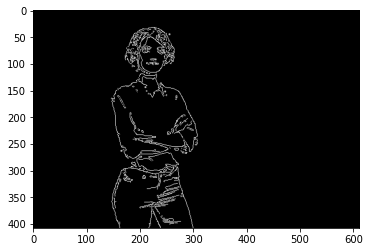

In [9]:
gray_woman = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

woman_edges = cv2.Canny(gray_woman, 25, 200)

retval, binary = cv2.threshold(woman_edges, 127, 255, cv2.THRESH_BINARY)
binary = cv2.dilate(binary, np.ones((3,3)), iterations = 0)

plt.imshow(binary, cmap="gray")


In [10]:
# Find contours in binary image
(contours, _) = cv2.findContours(woman_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

woman_copy = np.copy(segmented_image)



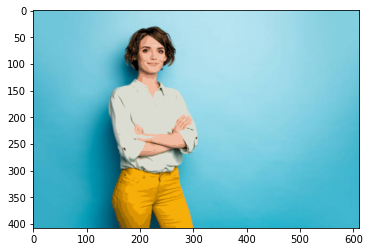

In [11]:
# Add the two images together to create a complete image!
complete_image = woman_copy + background_image
# Display the result
plt.imshow(complete_image)

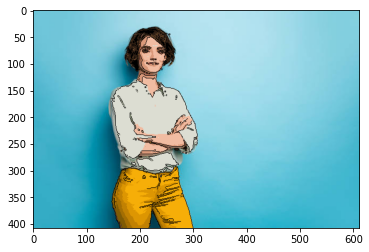

In [12]:
all_contours = cv2.drawContours(complete_image, contours, -1, (0,0,0), 1)
plt.imshow(all_contours)

#### Ejercicio 2 (20 puntos)

Utilizando [Haar Cascade Classifiers](https://github.com/opencv/opencv/tree/master/data/haarcascades), detecta gatos en las imágenes **cat1.jpg**, **cat2.jpg**, y **cat3.jpg**. Dibuja un círculo encima de la cara de los gatos. **NOTA** Hay gatos en todas las imágenes, y en **cat3.jpg** hay varios gatos.

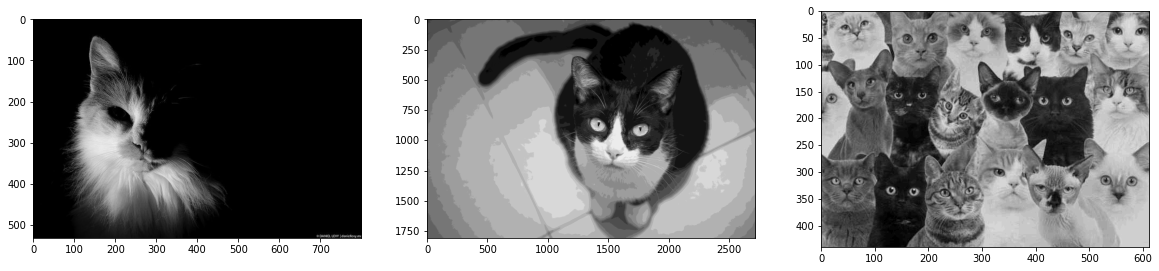

In [13]:
cat1 = cv2.imread('images/cats/cat1.jpg')
cat2 = cv2.imread('images/cats/cat2.jpg')
cat3 = cv2.imread('images/cats/cat3.jpg')

#convert image to RGB
cat1 = cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB)
cat2 = cv2.cvtColor(cat2, cv2.COLOR_BGR2RGB)
cat3 = cv2.cvtColor(cat3, cv2.COLOR_BGR2RGB)

#convert image to gray escale
cat1_gray = cv2.cvtColor(cat1, cv2.COLOR_RGB2GRAY)
cat2_gray = cv2.cvtColor(cat2, cv2.COLOR_RGB2GRAY)
cat3_gray = cv2.cvtColor(cat3, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(cat1_gray, cmap='gray')
ax2.imshow(cat2_gray, cmap='gray')
ax3.imshow(cat3_gray, cmap='gray')


In [14]:
haar_cascade = cv2.CascadeClassifier()
#print(haar_cascade)

if not haar_cascade.load('haar_cascade/haarcascade_frontalcatface.xml'):
    print("Error loading cascade classifier")
else:
    print("Classifier loaded correctly")
#faces_cat_images = [haar_cascade.detectMultiScale(img_of_cat) for img_of_cat in  cat_gray_images]

Classifier loaded correctly


In [25]:
#equalize the image 
cat1_eq = cv2.equalizeHist(cat1_gray)
cat2_eq = cv2.equalizeHist(cat2_gray)
cat3_eq = cv2.equalizeHist(cat3_gray)

#apply the clasifier
faces1 = haar_cascade.detectMultiScale(cat1_gray)
faces2 = haar_cascade.detectMultiScale(cat2_gray)
faces3 = haar_cascade.detectMultiScale(cat3_gray, 1.12, 2)


for (x,y,w,h) in faces1:
    center = (x + w//2, y + h//2)
    cat1_gray = cv2.ellipse(cat1_gray, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

for (x,y,w,h) in faces2:
    center = (x + w//2, y + h//2)
    cat2_gray = cv2.ellipse(cat2_gray, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

for (x,y,w,h) in faces3:
    center = (x + w//2, y + h//2)
    cat3_gray = cv2.ellipse(cat3_gray, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)


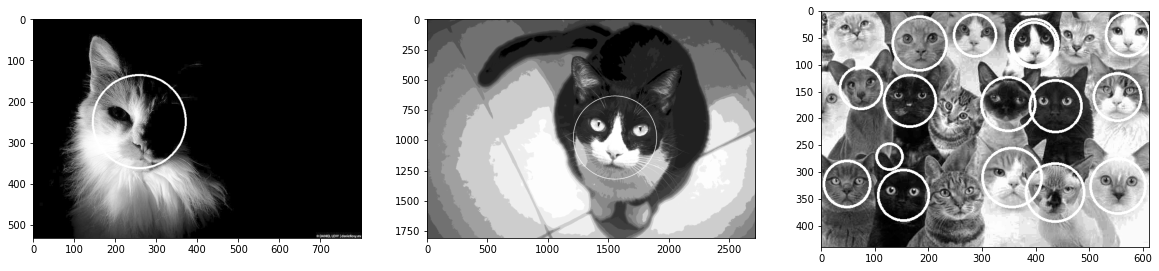

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(cat1_gray, cmap='gray')
ax2.imshow(cat2_gray, cmap='gray')
ax3.imshow(cat3_gray, cmap='gray')

#### Ejercicio 3 (35 puntos)

Crea un pipeline de visión para calificar automáticamente un examen de opción múltiple. Utiliza la imagen **Bubble_test.png**

![Expected output](images/Bubble_test.png)

El resultado esperado es que se detecten las respuestas seleccionadas:

![Expected output](images/Bubble_test_solved.png)

y que calcule y muestre la calificación asumiendo que las respuestas del examen son las siguientes:

1. A
2. B
3. B
4. C
5. A
6. A
7. B
8. B
9. C
10. D

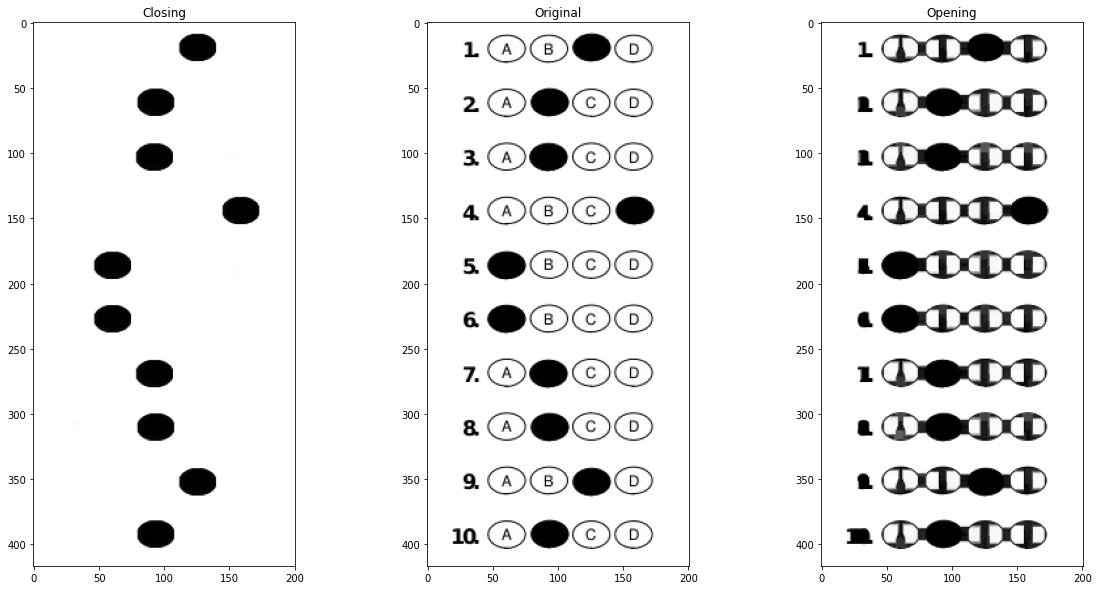

In [17]:
#read the image
imgBubble = cv2.imread('images/Bubble_test.png')
kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(imgBubble, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(imgBubble, cv2.MORPH_OPEN, kernel)
f2, (ax21, ax22, ax23) = plt.subplots(1, 3, figsize=(20,10))
ax21.set_title("Closing")
ax21.imshow(closing, cmap="gray")
ax22.set_title("Original")
ax22.imshow(imgBubble, cmap="gray")
ax23.set_title("Opening")
ax23.imshow(opening, cmap="gray")



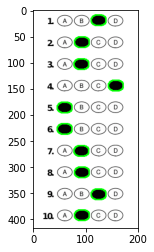

In [18]:
gray = cv2.cvtColor(closing,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# Find contours from thresholded, binary image
(contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(imgBubble)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 2)

plt.imshow(contours_image)

Centroid 0: (93 , 392)
Centroid 1: (125 , 352)
Centroid 2: (93 , 310)
Centroid 3: (92 , 269)
Centroid 4: (60 , 227)
Centroid 5: (60 , 186)
Centroid 6: (158 , 144)
Centroid 7: (92 , 103)
Centroid 8: (93 , 61)
Centroid 9: (125 , 19)


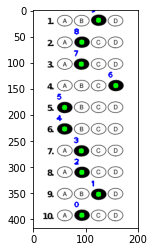

In [19]:
cropped_image = np.copy(imgBubble)

for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])

        print(f'Centroid {idx}: ({cx} , {cy})')

        cv2.circle(cropped_image, (cx, cy), 5, (0, 255, 0), -1)

        cv2.putText(cropped_image, str(idx), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2, cv2.LINE_8)

plt.imshow(cropped_image)

In [20]:
answers = []
right_ans = ['A','B','B','C','A','A','B','B','C','D']
# 1. A
# 2. B
# 3. B
# 4. C
# 5. A
# 6. A
# 7. B
# 8. B
# 9. C
# 10.D

for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])


        if cx == 60:
            answers.append('A')
        elif cx == 92 or cx == 93:
            answers.append('B')
        elif cx == 125:
            answers.append('C')
        elif cx == 158:
            answers.append('D')

finalAns = answers[::-1]

print('correct answers: ', right_ans)
print('your answers: ', finalAns)


correct answers:  ['A', 'B', 'B', 'C', 'A', 'A', 'B', 'B', 'C', 'D']
your answers:  ['C', 'B', 'B', 'D', 'A', 'A', 'B', 'B', 'C', 'B']


In [21]:
counter = 0
finalgrade=[]

for i in range(len(right_ans)):
    if right_ans[i] == finalAns[i]:
        counter += 1
        finalgrade.append('correct')
    else:
        finalgrade.append('wrong')
print('your grade: ', (counter/len(right_ans))*100)
print('your grade: ', finalgrade)


your grade:  70.0
your grade:  ['wrong', 'correct', 'correct', 'wrong', 'correct', 'correct', 'correct', 'correct', 'correct', 'wrong']
